# *Catbars* step by step

*Simple bars, four features*

In [1]:
from catbars import Bars
import pandas as pd

In [2]:
df = pd.DataFrame({'numbers' : [1, 10, 2, 3],
                 'name' : ['one', 'ten', 'two', 'three'],
                 'parity' : ['odd', 'even', 'even', 'odd'],
                 'french_name' : ['un', 'dix', 'deux', 'trois']})
df

,numbers,name,parity,french_name
0,1,one,odd,un
1,10,ten,even,dix
2,2,two,even,deux
3,3,three,odd,trois


# Raw bars

The first feature is the only positional (required) argument. It is a numerical feature.

First bars in the list appear on the top of the figure.

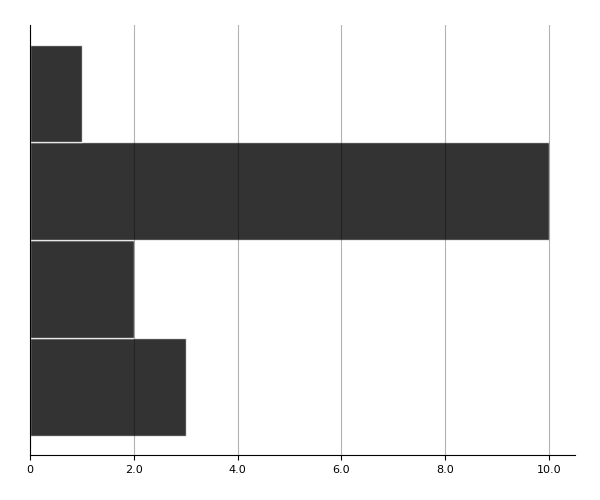

In [3]:
Bars(df['numbers'])

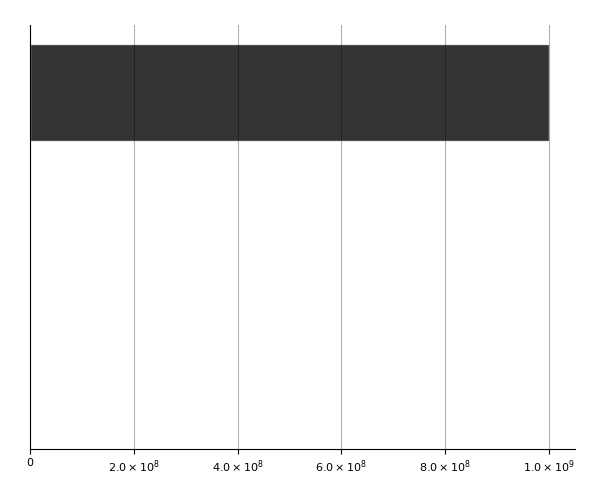

In [4]:
Bars([1e9, 1e3, 1e6, 1])

## With ```auto_scale```

*Catbars* automatically adapts the x scale to the data.

Therefore, if the bar orders of magnitude are too different, the logarithmic scale is used.

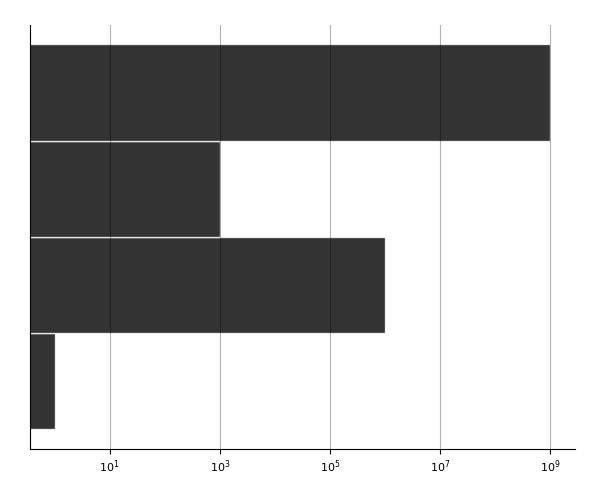

In [5]:
Bars([1e9, 1e3, 1e6, 1],
    auto_scale = True)

You can chose the color you want.

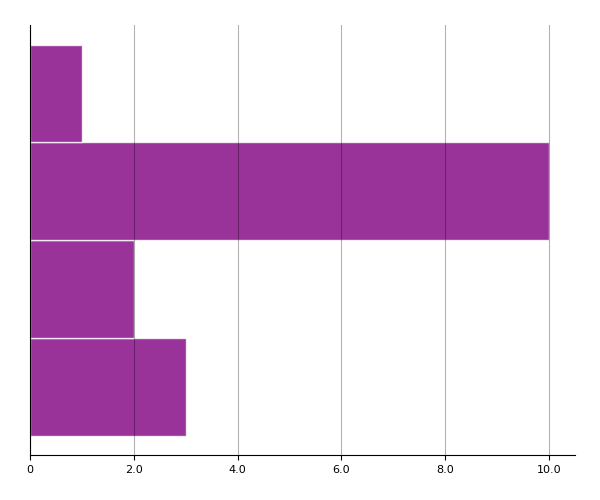

In [6]:
Bars(df['numbers'],
    default_color = 'purple')

# Up to three features can be visualized in addition to the first numerical feature

### Right labels

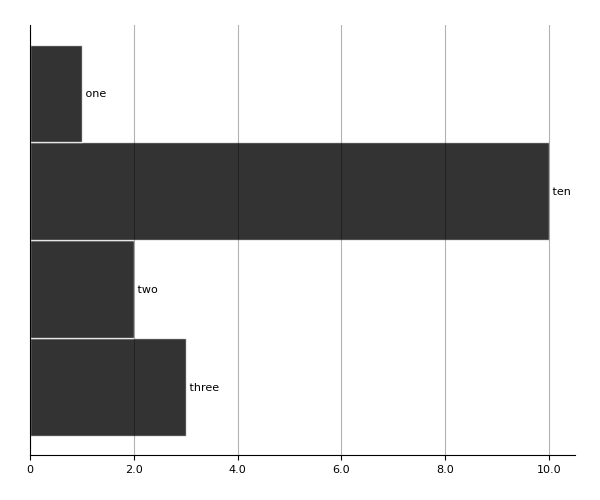

In [7]:
Bars(df['numbers'],
    right_labels = df['name'])

### Right and classic labels

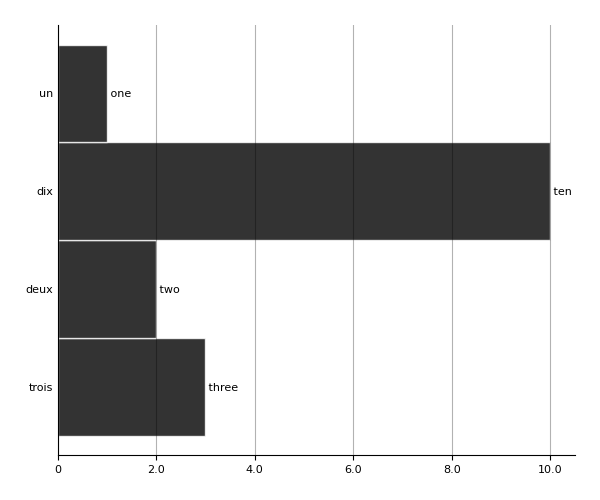

In [8]:
Bars(df['numbers'],
    right_labels = df['name'],
    left_labels = df['french_name'])

### Color management (the fourth feature)

If there are more categories than available colors, residual categories are mapped to a default color.

Default available colors (SEE BELOW ```tints``` in the configuration section) are assigned first to the most common categories in the selected slice.

The whole list is considered for the mapping if ```global_view``` is enabled.

You can override the way **Catbars** manage colors by specifying
   - the ```color_dic``` argument (a dictionary mapping color categories to actual color) or
   - the ```tints``` argument (the list of colors used by automatic mapping).

Those two overriding ways are mutually exclusive.

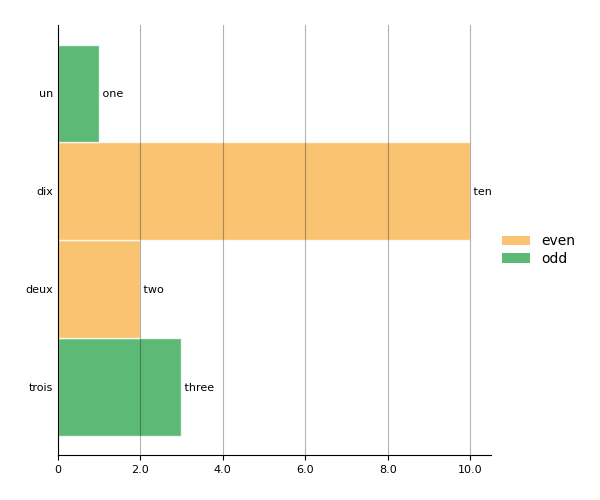

In [9]:
Bars(df['numbers'],
    right_labels = df['name'],
    left_labels = df['french_name'],
    colors = df['parity'])

**The figure automatically adapt to long right labels.**

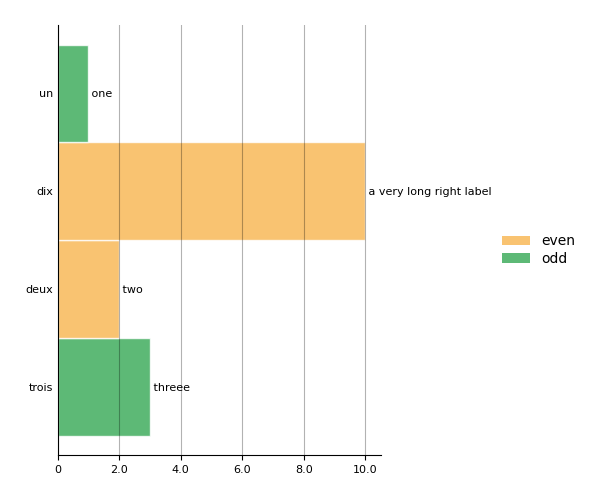

In [10]:
Bars(df['numbers'],
    right_labels = ['one', 'a very long right label', 'two', 'threee'],
    left_labels = df['french_name'],
    colors = df['parity'])

Another example for the ```colors```argument.

Moreover, you can add a vertical line.

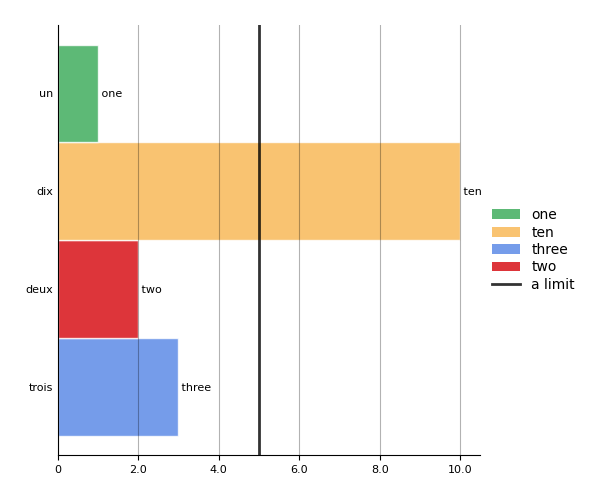

In [11]:
Bars(df['numbers'],
    right_labels = df['name'],
    left_labels = df['french_name'],
    colors = df['name'],
    line_dic = {'number': 5,
                'color': 'black',
                'label': 'a limit'})

Colors to use can be specified.

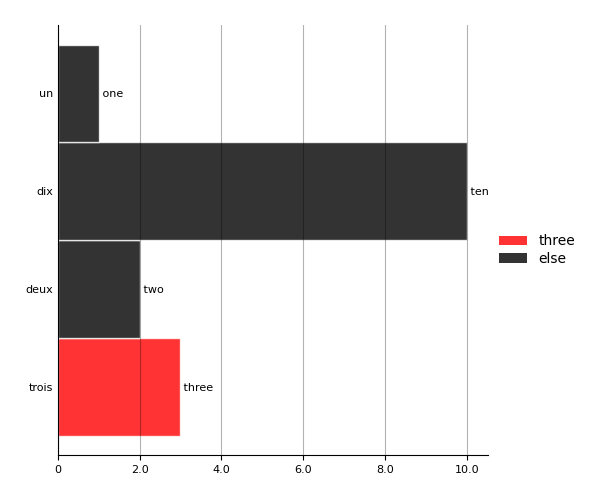

In [12]:
Bars(df['numbers'],
    right_labels = df['name'],
    left_labels = df['french_name'],
    colors = df['name'],
    color_dic = {'three': 'red'})

The default label for residual categories can be overriden.

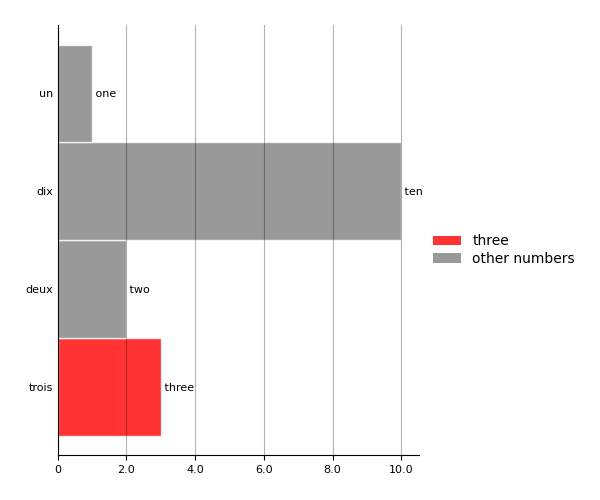

In [13]:
Bars(df['numbers'],
    right_labels = df['name'],
    left_labels = df['french_name'],
    colors = df['name'],
    color_dic = {'three': 'red'},
    default_label = 'other numbers',
    default_color = 'gray')


***
# Sorting and slicing


The sort is performed on a copy (no side effects) in descending order.

It is *slice-wide* by default (*list-wide* if ```global_view```is enabled).

The ```slice``` tuple is one-based and applied to all features.

#### About the ```'rank'``` option
 - You can use the ```'rank'``` option with ```labels``` or ```left_labels``` to create an index.
 - This index restarts from 1 for the selected slice by default. The index is *list-wide* if ```global_view``` is enabled.


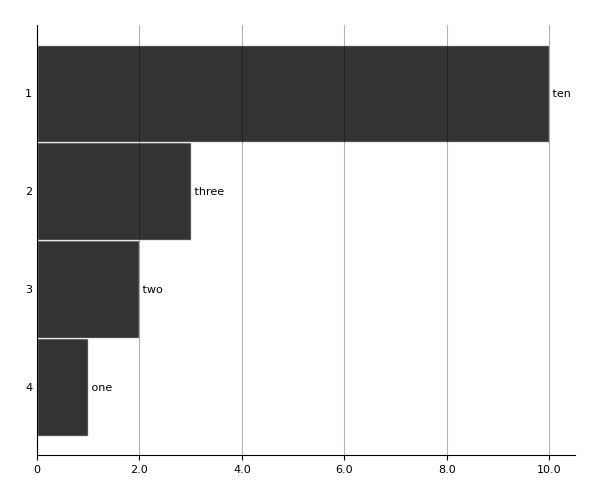

In [14]:
Bars(df['numbers'],
    right_labels = df['name'],
    left_labels = 'rank',
    sort = True)

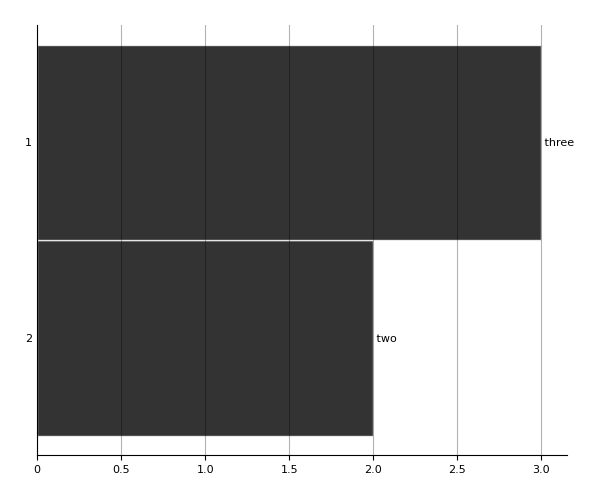

In [15]:
Bars(df['numbers'],
    right_labels = df['name'],
    left_labels = 'rank',
    sort = True,
    slice = (3,4))

**When ```global_view``` is enabled, among other consequences, the data bounds are the whole list bounds.**

This function can be useful to split one long chart into several smaller charts in a consistent way.

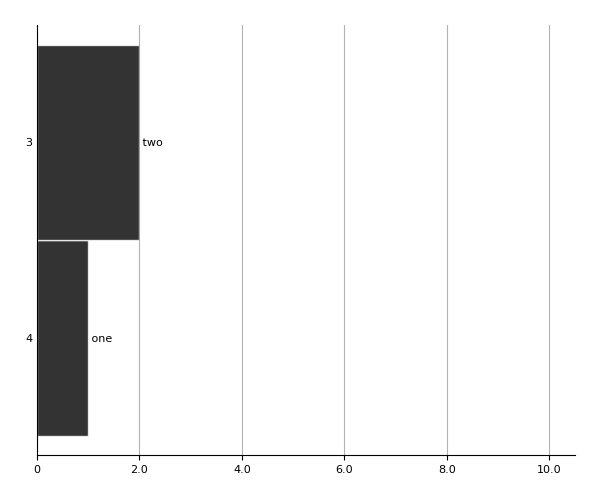

In [16]:
Bars(df['numbers'],
    right_labels = df['name'],
    left_labels = 'rank',
    sort = True,
    slice = (3,4),
    global_view = True)

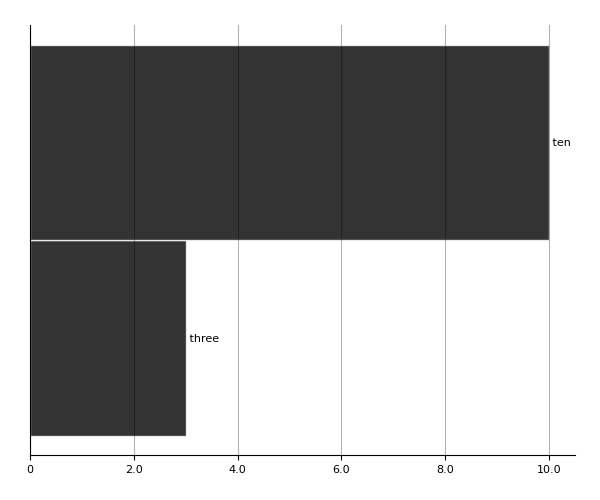

In [17]:
Bars(df['numbers'],
    right_labels = df['name'],
    sort = True,
    slice = (1,2),
    global_view = True)

**There is another option  named ```'proportion'```.**

It computes the proportion of each bar relative to the slice total (or the list total if ```global_view```is enabled).

**This option allows bar charts to replace pie charts.**

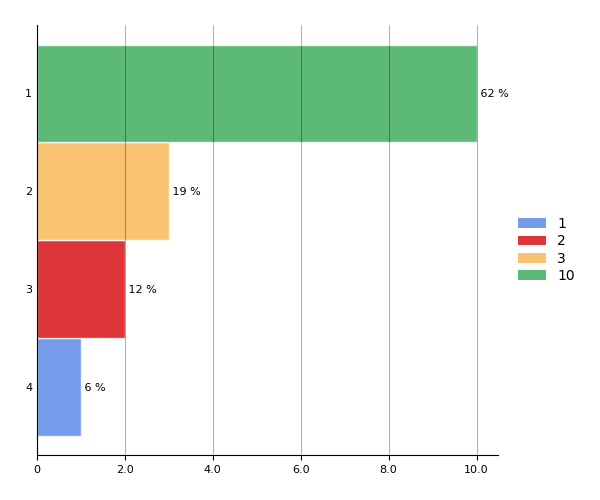

In [18]:
Bars(df['numbers'],
    left_labels = 'rank',
    colors = df['numbers'],
    right_labels = 'proportion',
    sort = True)

***
# Titles for publication: title, xlabel, ylabel, legend_title

With ```Catbars```, what you see in your notebook is what you get.

Given the selected font sizes and the figure size (```figsize```and ```dpi```), the data space adapt to your labels and title texts.

However, if your texts are definitely too long for the available pixels, you can try to split your texts in lines with ```\n```, you can extend the figure or you can reduce font sizes (SEE the configuraton topic).

**The following figure is the same size than the previous one !**


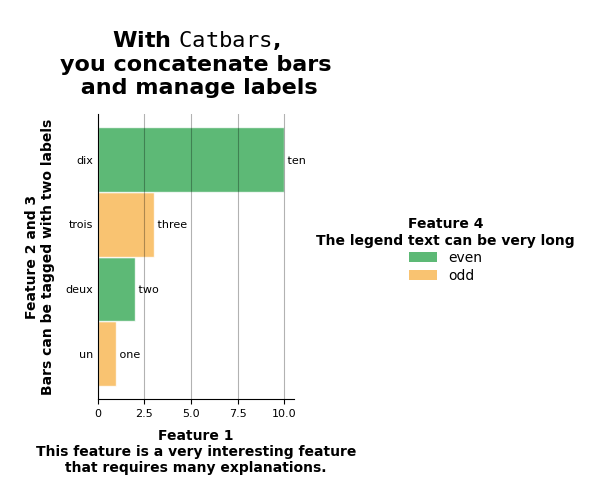

In [19]:
Bars(df['numbers'],
    right_labels = df['name'],
    left_labels = df['french_name'],
    colors = df['parity'],
    sort = True,
    xlabel = 'Feature 1\nThis feature is a very interesting feature\nthat requires many explanations.',
    ylabel = 'Feature 2 and 3\nBars can be tagged with two labels',
    title = 'With $\mathtt{Catbars}$,\nyou concatenate bars\n and manage labels',
    legend_title = 'Feature 4\nThe legend text can be very long')

***
# Advanced configuration

The ```conf``` class attribute lists all the advanced parameters you can redefine by using simple key word arguments.

If it is not enough, you can rewrite the **conf.py** module which is a decorator for the Matplotlib settings. This file is normally located in the library top level directory (```sys.path```and the command ```pip show catbars ``` can be useful to locate that directory).

In [20]:
Bars.conf

{'right_label_max_it': 1000,
 'min_ax_width': 0.01,
 'right_label_solver_tolerance': 0.001,
 'figsize': (6, 5),
 'dpi': 100,
 'default_color': 'black',
 'default_label': 'else',
 'tints': ['#34a854',
  '#f8b44e',
  '#d50209',
  '#5284e5',
  '#f76c00',
  '#a8a8a8',
  '#eb66b4',
  '#191970',
  '#6636a9'],
 'color_alpha': 0.8,
 'margin': 0.05,
 'title_pad': 0.04,
 'pad': 0.02,
 'title_font_size': 16,
 'axis_title_font_size': 10,
 'data_font_size': 8}

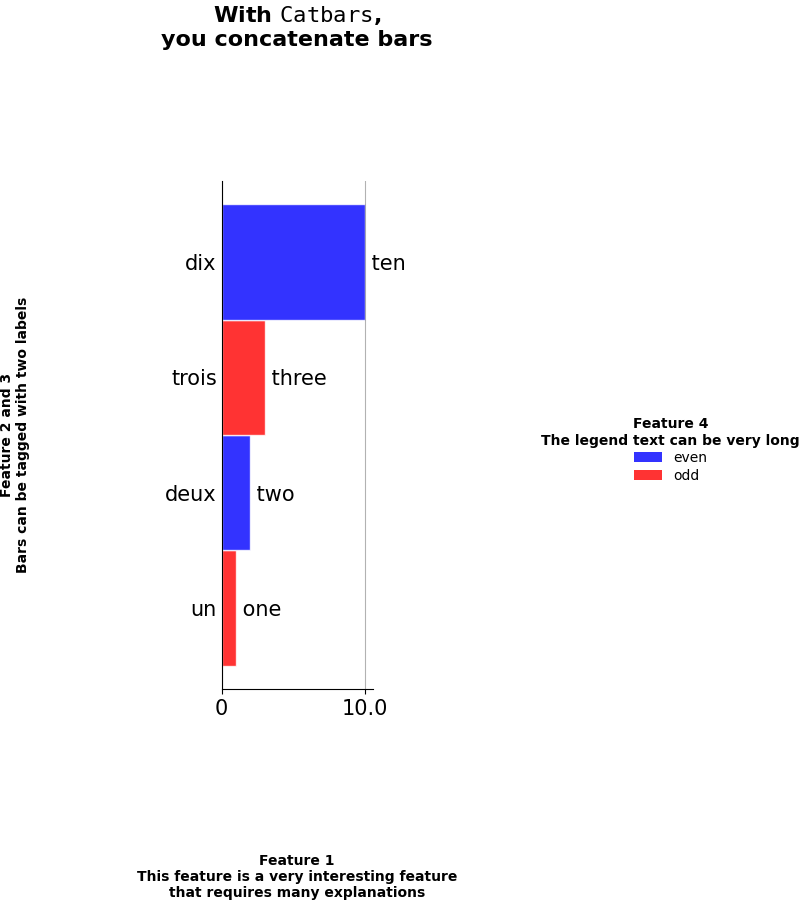

In [21]:
Bars(df['numbers'],
    right_labels = df['name'],
    left_labels = df['french_name'],
    colors = df['parity'],
    sort = True,
    xlabel = 'Feature 1\nThis feature is a very interesting feature\nthat requires many explanations',
    ylabel = 'Feature 2 and 3\nBars can be tagged with two labels',
    title = 'With $\mathtt{Catbars}$,\nyou concatenate bars',
    legend_title = 'Feature 4\nThe legend text can be very long',
    legend_visible = True,
    figsize = (8,9),
    pad = 0.15,
    title_pad = 0.15,
    margin = 0,
    tints = ['blue', 'red'],
    data_font_size = 15)

***
## For more information

In [22]:
help(Bars)

Help on class Bars in module catbars.bars:

class Bars(builtins.object)
 |  Bars(numbers, left_labels=None, right_labels=None, colors=None, line_dic=None, sort=False, slice=None, global_view=False, auto_scale=False, color_dic=None, title=None, xlabel=None, ylabel=None, legend_title=None, legend_visible=True, file_name=None, **kwargs)
 |  
 |  This class represents a complex horizontal bar chart.
 |  
 |  This class extends (by composition) the functionality provided
 |  by Matplotlib.
 |  The chart is automatically rendered in Jupyter notebooks and can
 |  be saved on disk.
 |  The chart can be tailored to a great extent by passing keyword
 |  arguments to the constructor. (SEE the class attribute **Bars.conf**
 |  for listing the other optional **kwargs**).
 |  If it is not enough, the **conf.py** module in the Catbars package
 |  gives users full control over "rcParams".
 |  
 |  Parameters
 |  -----------    
 |  
 |  numbers : iterable container
 |      The numbers specifying the w